In [2]:
from scipy.integrate import *
import matplotlib.pyplot as plt
from math import *
import bohrium as np
from scipy.optimize import *

In [3]:
cai = 100.0e-9
cae = 1.0e-6


# Volume Normalisations
vol_er = (3.9*0.1*0.1)
vol_cyt = (4.0*0.5*0.5-vol_er)
vol_tot = vol_cyt + vol_er
ntot = 1
ctot = ntot/vol_tot
fvol_cyt = vol_cyt/vol_tot
fvol_er = vol_er/vol_tot

In [4]:
def f(m):
    return m**(2.0/3.0) #multiplier 

# Reaction Rates
k_orig={
    'kx1_x1a' : 2*1.0e8,
    'kx1a_x2' : 1.0e8,
    'kx1a_x1' : 83.666,
    'kx2_x1a' : 2*83.666,
    'kx2_y2' : 0.6,
    'ky2_x2' : 4.118, #corrected
    'ky2_y1a' : 2*30.015,
    'ky1a_y1' : 30.015,
    'ky1a_y2' : 1.0e5,
    'ky1_y1a' : 2*1.0e5,
    'ky1_x1' : 0.4,
    'kx1_y1' : 1.20e-3,
    'kca' : 0#40.45 #update
}

a="""k_SERCA_X1_X1A = f*2.0e8*sm	
k_SERCA_X1A_X2 = f*1.0e8*sm
k_SERCA_X1A_X1 = 83.666*sm
k_SERCA_X2_X1A = 2*83.666*sm
k_SERCA_X2_Y2  = f*0.6*sm
k_SERCA_Y2_X2  = 4.118*sm  //some correction by Nishant
k_SERCA_Y1A_Y1 = 30.015*sm
k_SERCA_Y2_Y1A = 2*30.015*sm
k_SERCA_Y1A_Y2 = 1.0e5*sm
k_SERCA_Y1_Y1A = 2.0e5*sm
k_SERCA_Y1_X1  = 0.4*sm
k_SERCA_X1_Y1  = 1.2e-3*sm"""

In [5]:
# SERCA ODE model
def serca_ode(v ,t):
    fx1, fx1a, fx2, fy2, fy1a, fy1, cae = v 
    for key in k.keys():
        exec(key + " = "+str(k[key]))

    dx1 = fx1*(-kx1_x1a*cai-kx1_y1)+fx1a*kx1a_x1+fy1*ky1_x1
    dx1a = fx1a*(-kx1a_x2*cai-kx1a_x1)+fx1*cai*kx1_x1a+fx2*kx2_x1a
    dx2 = fx2*(-kx2_y2-kx2_x1a)+fx1a*cai*kx1a_x2+fy2*ky2_x2

    dy1 = fy1*(-ky1_y1a*cae-ky1_x1)+fy1a*ky1a_y1+fx1*kx1_y1
    dy1a = fy1a*(-ky1a_y2*cae-ky1a_y1)+fy1*cae*ky1_y1a+fy2*ky2_y1a
    dy2 = fy2*(-ky2_x2-ky2_y1a)+fy1a*cae*ky1a_y2+fx2*kx2_y2

    dcae = -cae*(fy1a*ky1a_y2 + fy1*ky1_y1a) + (fy1a*ky1a_y1 + fy2*ky2_y1a) + kca*(cai - cae)
    #print dcae

    return [dx1, dx1a, dx2, dy2, dy1a, dy1, dcae]

In [30]:
#params for 250
cae=250e-6
sf=1
sm=15
k=k_orig.copy()
for key in ['ky2_x2','kx2_y2','ky1_x1','kx1_y1']:
    k[key]=k[key]*sm
    
#for key in k.keys():
#    k[key]=k[key]*sm

# Initial Conditions 250
v0 = [0.75554529, 0.18054556, 0.010757505, 0.011069105, 0.026363904, 0.015718635, cae]

#v0 = [0.58250749, 0.28762388, 0.06026734, 0.03595298, 0.02742567,0.0061074,cae]
#v0[3],v0[5] = v0[5],v0[3]
v0 = [0.79150804, 0.18920662, 0.011307258, 0.0016474684, 0.0039558979, 0.0023747239, cae]
#v0 = [1, 0, 0.0, 0, 0, 0.0, cae]
serca_x1_feq = 0.75554529
serca_x1a_feq = 0.18054556
serca_x2_feq = 0.010757505
serca_y1_feq = 0.015718635
serca_y1a_feq = 0.026363904
serca_y2_feq = 0.011069105

In [44]:
#params for 500
sf=2
sm=1
k=k_orig.copy()
for key in ['kx1_x1a','kx1a_x2']:
    k[key]=k[key]*sf
    
for key in ['ky2_x2','kx2_y2','ky1_x1','kx1_y1']:
    k[key]=k[key]*sm

# Initial Conditions 500
#v0 = [0.75554529, 0.18054556, 0.010757505, 0.015718635, 0.026363904, 0.011069105, cae]
cae=500e-6
#v0 = [0.62341553, 0.28796958, 0.04206038, 0.019705, 0.02051164, 0.00633787,cae]
#v0[3],v0[5] = v0[5],v0[3]
v0=[6.42444113e-01, 3.07147043e-01, 3.67110945e-02, 5.34887244e-03, 6.42154346e-03, 1.92733239e-03, cae]
#v0 = [0.79150804, 0.18920662, 0.011307258, 0.0023747239, 0.0039558979, 0.0016474684, cae]
#v0 = [1, 0, 0.0, 0, 0, 0.0, cae]

In [34]:
#params for 750
sf=3.0
sm=1
k=k_orig.copy()
for key in ['kx1_x1a','kx1a_x2']:
    k[key]=k[key]*sf
    
for key in k.keys():#['ky2_x2','kx2_y2','ky1_x1','kx1_y1']:
    k[key]=k[key]*sm

# Initial Conditions 500
#v0 = [0.75554529, 0.18054556, 0.010757505, 0.015718635, 0.026363904, 0.011069105, cae]
cae=750e-6
#v0 = [0.62341553, 0.28796958, 0.04206038, 0.019705, 0.02051164, 0.00633787,cae]
#v0[3],v0[5] = v0[5],v0[3]
v0=[0.53122686, 0.38096253, 0.0683006 , 0.00995152, 0.00796481, 0.00159368, cae]
#v0 = [0.79150804, 0.18920662, 0.011307258, 0.0023747239, 0.0039558979, 0.0016474684, cae]
#v0 = [1, 0, 0.0, 0, 0, 0.0, cae]

In [45]:
tstep = 1e-2
tf = 100
t = np.linspace(0, tf, tf/tstep+1)

# Solve ODE
sol = odeint(serca_ode, v0, t)

array([6.42444113e-01, 3.07147043e-01, 3.67110945e-02, 5.34887244e-03,
       6.42154340e-03, 1.92733235e-03, 5.00024359e-04])

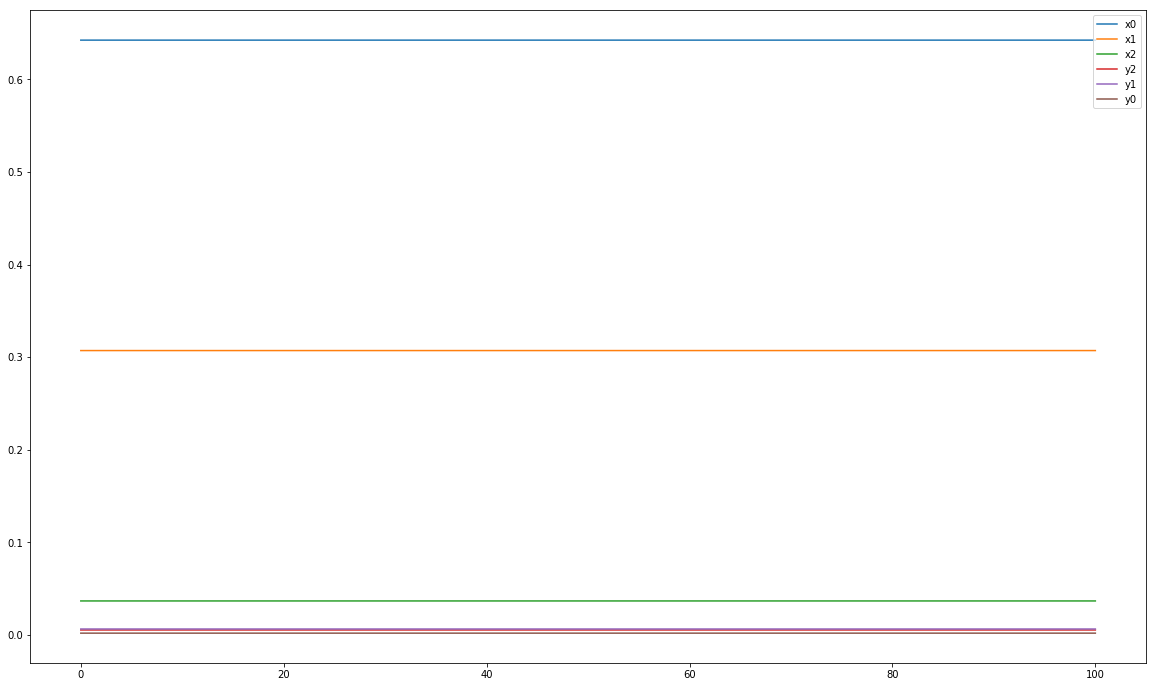

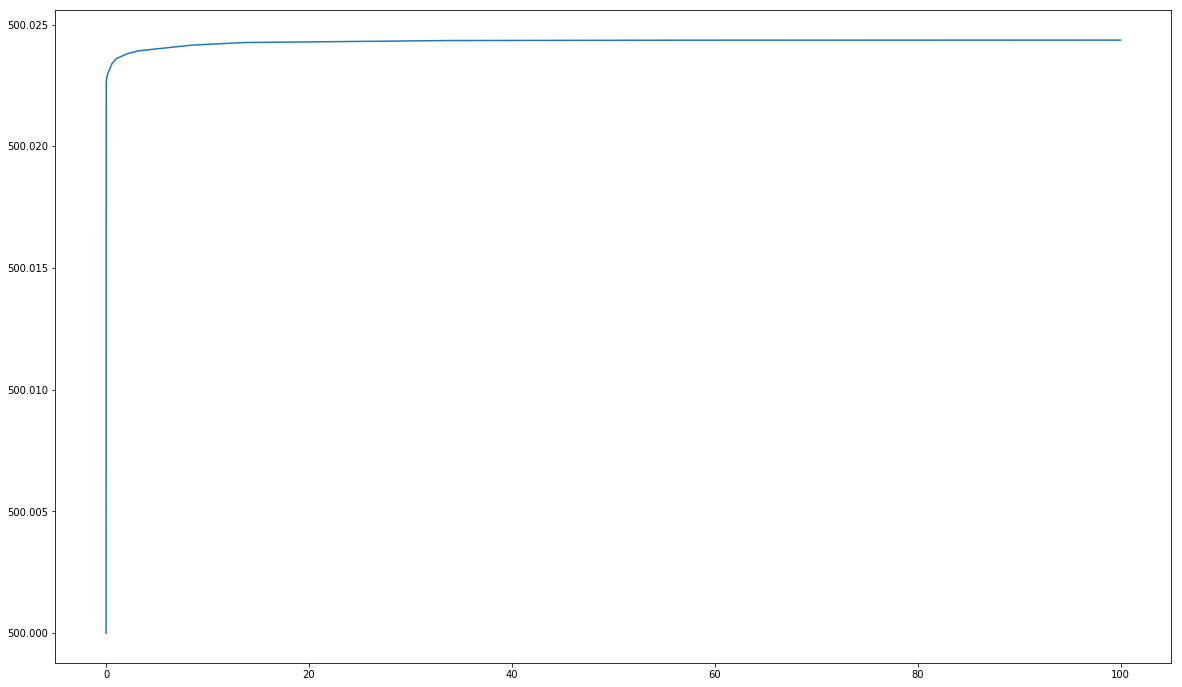

In [46]:
plt.figure(figsize=(20,12))
state_label=['x0','x1','x2','y2','y1','y0']
for i in range(6):
    plt.plot(t,sol[:,i],label=state_label[i])
         
plt.legend()


plt.figure(figsize=(20,12))
#grid(True)
plt.plot(t,sol[:,6]*1e6)
np.array(sol[-1,:])

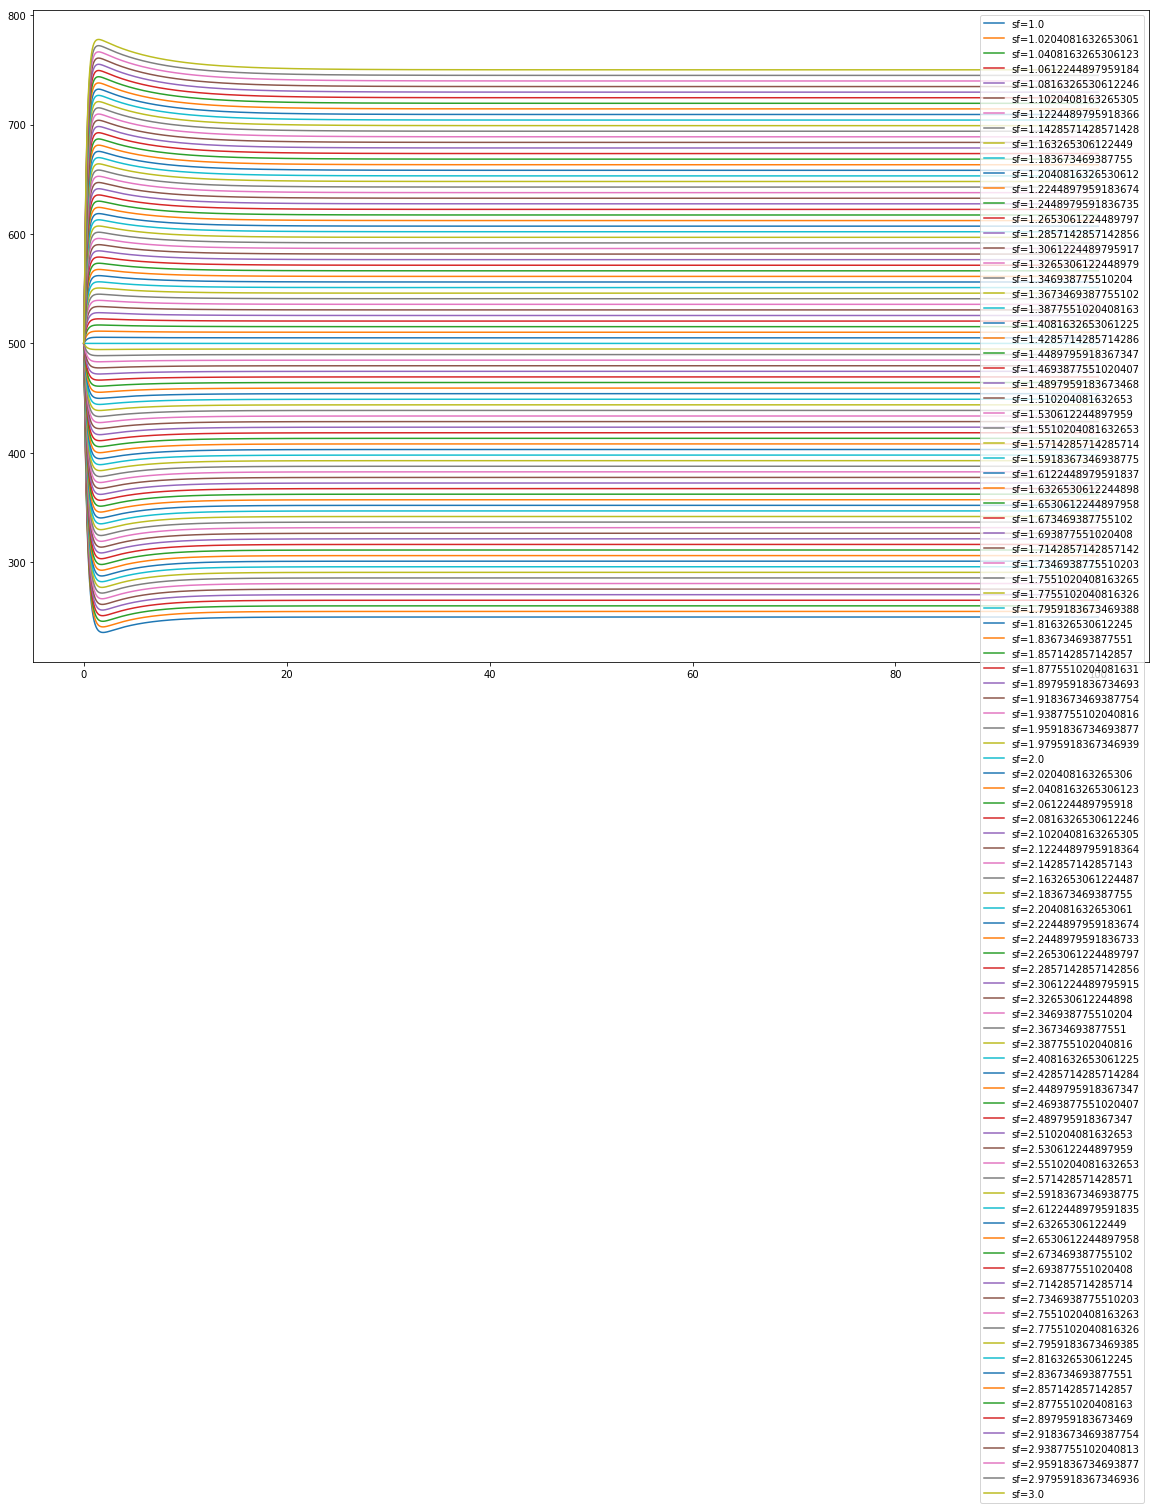

In [43]:
plt.figure(figsize=(20,12))
for sf in np.linspace(1.0,3.0,99):
    k=k_orig.copy()
    for key in ['kx1_x1a','kx1a_x2']:
        k[key]=k[key]*sf
    tstep = 1e-2
    tf = 100
    t = np.linspace(0, tf, tf/tstep+1)

    # Solve ODE
    sol = odeint(serca_ode, v0, t)
    plt.plot(t,sol[:,6]*1e6,label='sf='+str(sf))
plt.legend()
    

In [6]:
def func_tbs(f,eq_value):
	print f[0]
	k['kx1_xa'],k['kx1a_x2']=k['kx1_x1a']*f[0],k['kx1a_x2']*f[0] 
	sol = odeint(serca_ode, v0, t)
	return sol[-1,-1]-eq_value

In [7]:
k=k_orig.copy()
cae=0
v0 = [0.4, 0.1, 0.0, 0.4, 0.1, 0.0, cae]

tstep = 1e-2
tf = 100
t = np.arange(0, tf, tstep)

In [ ]:
SOL=fsolve(func_tbs,1,args=(500.0e-6,))

In [23]:
print np.linspace(1.0,3.0,10)

[1.         1.22222222 1.44444444 1.66666667 1.88888889 2.11111111
 2.33333333 2.55555556 2.77777778 3.        ]
